In [170]:
# Read csv Theft_from_Motor_Vehicle.csv

import pandas as pd

df = pd.read_csv('Theft_from_Motor_Vehicle.csv')
df.head()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.835512e+06,5.418252e+06,1,GO-20141260616,D53,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mobile)",House,2142,...,1.0,1.0,Wednesday,2,NonMCI,56,Leaside-Bennington,-79.370758,43.694274,1
1,-8.844479e+06,5.422776e+06,2,GO-20149000010,D32,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,15,NonMCI,31,Yorkdale-Glen Park,-79.451310,43.723650,2
2,-8.836012e+06,5.410878e+06,3,GO-20141261694,D51,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",Commercial,2142,...,1.0,1.0,Wednesday,1,NonMCI,77,Waterfront Communities-The Island,-79.375245,43.646361,3
3,-8.849244e+06,5.422821e+06,4,GO-20141262668,D31,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,18,NonMCI,26,Downsview-Roding-CFB,-79.494115,43.723947,4
4,-8.838679e+06,5.410277e+06,5,GO-20141261604,D14,2013/12/31 05:00:00+00,2014/01/01 05:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2142,...,31.0,365.0,Tuesday,16,NonMCI,77,Waterfront Communities-The Island,-79.399201,43.642458,5


In [171]:
# Convert reporteddate to datetime
df['reporteddate'] = pd.to_datetime(df['reporteddate'])

# Create a new column year month and day
df['year'] = df['reporteddate'].dt.year
df['month'] = df['reporteddate'].dt.month
df['day'] = df['reporteddate'].dt.day

<AxesSubplot: xlabel='year'>

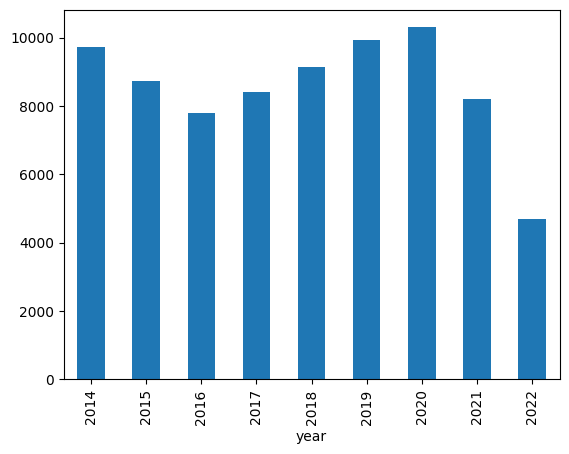

In [172]:
# Graph the number of thefts per year
df.groupby('year')['reporteddate'].count().plot(kind='bar')


<AxesSubplot: xlabel='month'>

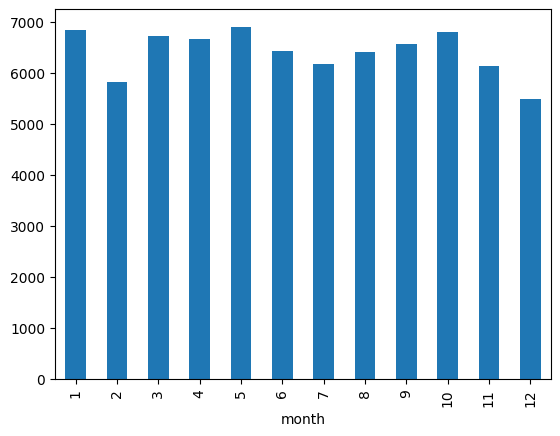

In [173]:
# Graph the number of thefts per month
df.groupby('month')['reporteddate'].count().plot(kind='bar')

<AxesSubplot: xlabel='year,month'>

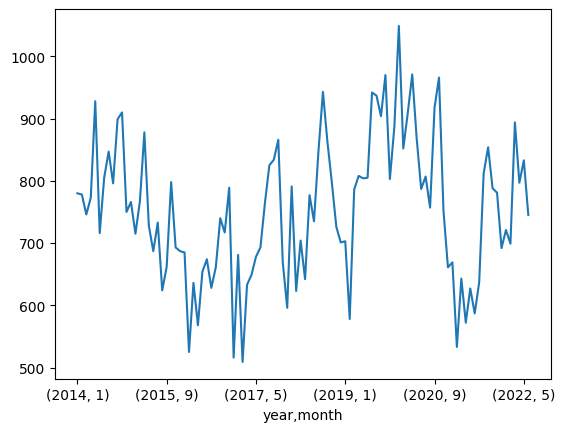

In [174]:
# Graph the number of thefts per month and year
df.groupby(['year', 'month'])['reporteddate'].count().plot(kind='line')

<AxesSubplot: xlabel='year,month'>

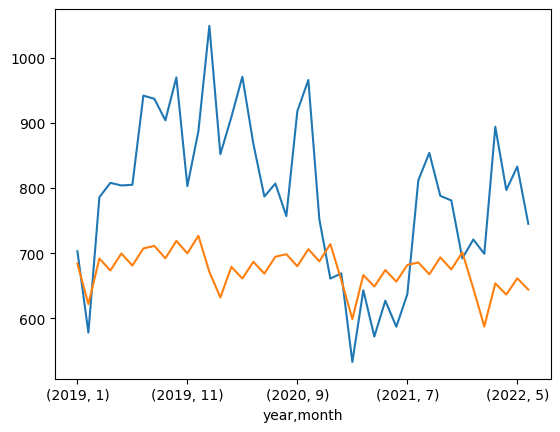

In [175]:

# Make a clone of the dataframe
df_ml = df.copy()

# Sum the number of thefts per day, month and year
df_ml = df_ml.groupby(['year', 'month', 'day'])['reporteddate'].count().reset_index()

# Rename the reporteddate column to thefts
df_ml.rename(columns={'reporteddate': 'thefts'}, inplace=True)

# Drop all columns except 'year' 'month' 'day' 'thefts'
df_ml = df_ml[['year', 'month', 'day', 'thefts']]

# Divide test and train data where test data is from 2019 to 2022 with loc
train_data = df_ml[df_ml['year'] < 2019]
test_data = df_ml[df_ml['year'] >= 2019]

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_data[['year', 'month', 'day']], train_data['thefts'])

# Predict the number of thefts
predictions = model.predict(test_data[['year', 'month', 'day']])

# Append the predictions to the test data use loc
test_data_graph = test_data.copy()
test_data_graph['predictions'] = predictions

# Plot the predicted thefts and actual thefts on the same graph by year and month
test_data_graph.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
test_data_graph.groupby(['year', 'month'])[
    'predictions'].sum().plot(kind='line')



In [176]:
# Calculate the model accuracy
from sklearn.metrics import mean_squared_error
mean_squared_error(test_data['thefts'], predictions)

78.17475554220727

In [177]:
from keras.optimizers import Adam
from keras.layers import Dense
from keras.models import Sequential

df_dl_1 = df.copy()

# Sum the number of thefts per day, month and year
df_dl_1 = df_dl_1.groupby(['year', 'month', 'day'])[
    'reporteddate'].count().reset_index()

# Rename the reporteddate column to thefts
df_dl_1.rename(columns={'reporteddate': 'thefts'}, inplace=True)

# Drop all columns except 'year' 'month' 'day' 'thefts'
df_dl_1 = df_dl_1[['year', 'month', 'day', 'thefts']]

# Divide test and train data where test data is from 2019 to 2022 with loc
train_data = df_dl_1[df_dl_1['year'] < 2019]
test_data = df_dl_1[df_dl_1['year'] >= 2019]

# Train a keras model with 1 input layer, 4 hidden layers and 1 output layer
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

# Train the model
model.fit(train_data[['year', 'month', 'day']], train_data['thefts'], epochs=1000)

Epoch 1/1000
58/58 [==============================] - 0s 1ms/step - loss: 305523.4375
Epoch 2/1000
58/58 [==============================] - 0s 1ms/step - loss: 29090.7500
Epoch 3/1000
58/58 [==============================] - 0s 1ms/step - loss: 7596.3398
Epoch 4/1000
58/58 [==============================] - 0s 1ms/step - loss: 2445.9194
Epoch 5/1000
58/58 [==============================] - 0s 1ms/step - loss: 777.5157
Epoch 6/1000
58/58 [==============================] - 0s 1ms/step - loss: 254.9520
Epoch 7/1000
58/58 [==============================] - 0s 1ms/step - loss: 107.4342
Epoch 8/1000
58/58 [==============================] - 0s 1ms/step - loss: 69.9480
Epoch 9/1000
58/58 [==============================] - 0s 1ms/step - loss: 62.2408
Epoch 10/1000
58/58 [==============================] - 0s 1ms/step - loss: 60.8288
Epoch 11/1000
58/58 [==============================] - 0s 1ms/step - loss: 60.5272
Epoch 12/1000
58/58 [==============================] - 0s 1ms/step - loss: 60.5057

In [178]:
# Calculate the model accuracy
print(model.evaluate(test_data[['year', 'month', 'day']], test_data['thefts']))
print(model.evaluate(train_data[['year', 'month', 'day']], train_data['thefts']))

40/40 [==============================] - 0s 954us/step - loss: 65.2279
65.22786712646484
58/58 [==============================] - 0s 926us/step - loss: 58.2450
58.245025634765625


In [179]:
# Predict the number of thefts
predictions = model.predict(test_data[['year', 'month', 'day']])
predictions = predictions.reshape(-1)

# Predict the number of thefts in train data
predictions_train = model.predict(train_data[['year', 'month', 'day']])
predictions_train = predictions_train.reshape(-1)

# Append the predictions to the test and train data
test_data_graph = test_data.copy()
test_data_graph['predictions'] = predictions

train_data_graph = train_data.copy()
train_data_graph['predictions'] = predictions_train


58/58 [==============================] - 0s 853us/step


<AxesSubplot: xlabel='year,month'>

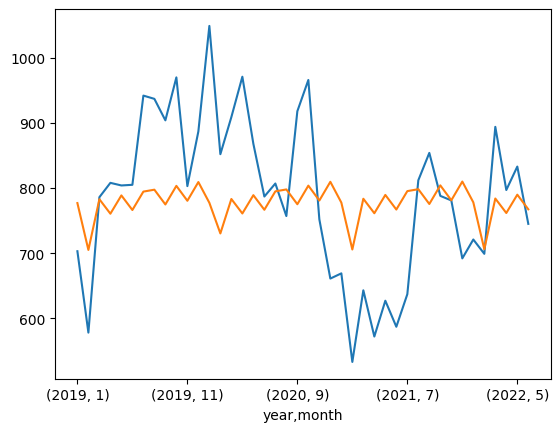

In [180]:
# Plot the predicted thefts and actual thefts on the same graph by year and month
test_data_graph.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
test_data_graph.groupby(['year', 'month'])[
    'predictions'].sum().plot(kind='line')


<AxesSubplot: xlabel='year,month'>

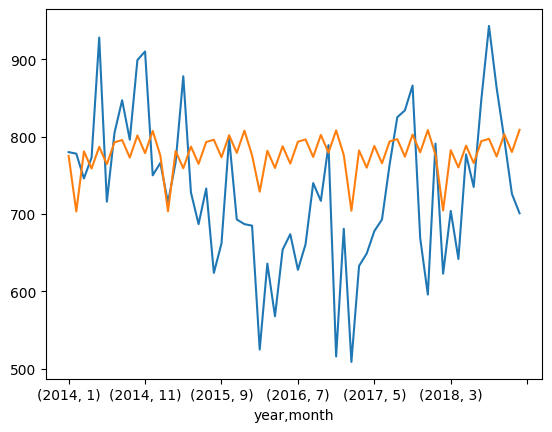

In [181]:
# Plot the predicted thefts and actual thefts on the same graph by year and month
train_data_graph.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
train_data_graph.groupby(['year', 'month'])[
    'predictions'].sum().plot(kind='line')


In [182]:

from fastai.tabular.all import *

df_dl_2 = df.copy()

# Sum the number of thefts per day, month and year
df_dl_2 = df_dl_2.groupby(['year', 'month', 'day'])[
    'reporteddate'].count().reset_index()

# Rename the reporteddate column to thefts
df_dl_2.rename(columns={'reporteddate': 'thefts'}, inplace=True)

df_dl_2.describe()

,year,month,day,thefts
count,3103.000000,3103.000000,3103.000000,3103.000000
mean,2017.762810,6.347083,15.722204,24.786980
std,2.461138,3.445776,8.797796,7.792526
min,2014.000000,1.000000,1.000000,4.000000
25%,2016.000000,3.000000,8.000000,19.000000
50%,2018.000000,6.000000,16.000000,24.000000
75%,2020.000000,9.000000,23.000000,30.000000
max,2022.000000,12.000000,31.000000,61.000000


<AxesSubplot: xlabel='year,month,day'>

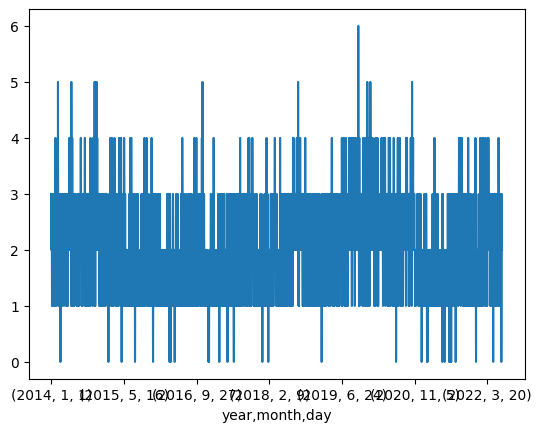

In [183]:
# Categorize number of thefts

def mapper(thefts: int) -> int:
    if thefts < 10:
        return 0
    elif thefts < 20:
        return 1
    elif thefts < 30:
        return 2
    elif thefts < 40:
        return 3
    elif thefts < 50:
        return 4
    elif thefts < 60:
        return 5
    elif thefts < 70:
        return 6
    elif thefts < 80:
        return 7
    elif thefts < 90:
        return 8
    elif thefts < 100:
        return 9
    else:
        return 10


# Drop all columns except 'year' 'month' 'day' 'thefts'
df_dl_2 = df_dl_2[['year', 'month', 'day', 'thefts']]

cat_df_dl_2 = df_dl_2.copy()

# Categorize number of thefts
cat_df_dl_2['thefts'] = df_dl_2['thefts'].apply(mapper)

# Plot the number of thefts per day
cat_df_dl_2.groupby(['year', 'month', 'day'])['thefts'].sum().plot(kind='line')

In [184]:
# Divide test and train data where test data is from 2019 to 2022 with loc
train_data = cat_df_dl_2[cat_df_dl_2['year'] < 2019]
test_data = cat_df_dl_2[cat_df_dl_2['year'] >= 2019]

# Setup data loader for fastai
splits = RandomSplitter(valid_pct=0.2)(range_of(train_data))
dls = TabularDataLoaders.from_df(train_data, y_names='thefts', cat_names=[
                                 'year', 'month', 'day'], cont_names=[], splits=splits, procs=[Categorify])
# Creatre a learner
learn = tabular_learner(dls, metrics=mse)


In [185]:
# Train the model
learn.fit_one_cycle(30)
learn.show_results()

epoch,train_loss,valid_loss,mse,time
0,5.047672,4.570907,4.570907,00:00
1,4.888037,4.449046,4.449046,00:00
2,4.731051,4.378668,4.378668,00:00
3,4.567829,4.240980,4.240980,00:00
4,4.344992,4.081677,4.081677,00:00
5,4.012542,3.511273,3.511273,00:00
6,3.536337,2.595190,2.595190,00:00
7,2.920492,1.725253,1.725253,00:00
8,2.262223,1.351701,1.351701,00:00
9,1.660112,1.102430,1.102430,00:00


,year,month,day,thefts,thefts_pred
0,3,1,30,1,1.841895
1,3,12,13,2,0.657204
2,2,10,14,3,2.411093
3,4,12,8,1,2.050128
4,5,3,23,2,1.849576
5,2,1,29,1,1.106152
6,3,3,28,1,2.802801
7,1,7,20,2,2.189029
8,3,5,19,1,1.309345


In [186]:
# User learner to predict the number of thefts in the test_data
dl = learn.dls.test_dl(test_data[['year', 'month', 'day']])
preds, _ = learn.get_preds(dl=dl)

# Convert the predictions to a numpy array and atach it to the test_data
test_data_with_preds = test_data.copy()
test_data_with_preds['predictions'] = preds.numpy()
test_data_with_preds.head()

,year,month,day,thefts,predictions
1826,2019,1,1,1,1.265052
1827,2019,1,2,3,2.055864
1828,2019,1,3,3,2.220108
1829,2019,1,4,2,1.676437
1830,2019,1,5,1,2.246836


<AxesSubplot: xlabel='year,month'>

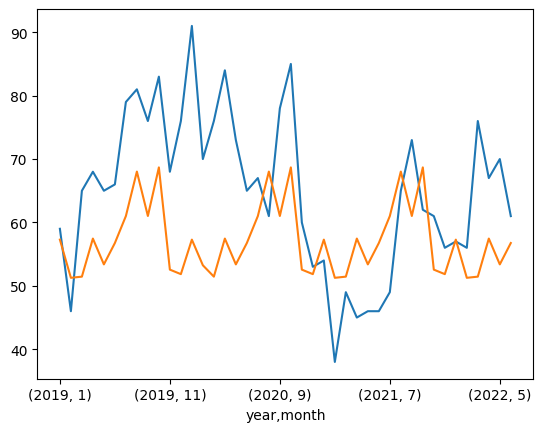

In [187]:
# Plot the predicted thefts and actual thefts on the same graph by year and month
test_data_with_preds.groupby(['year', 'month'])['thefts'].sum().plot(kind='line')
test_data_with_preds.groupby(['year', 'month'])['predictions'].sum().plot(kind='line')